In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Correlation Check

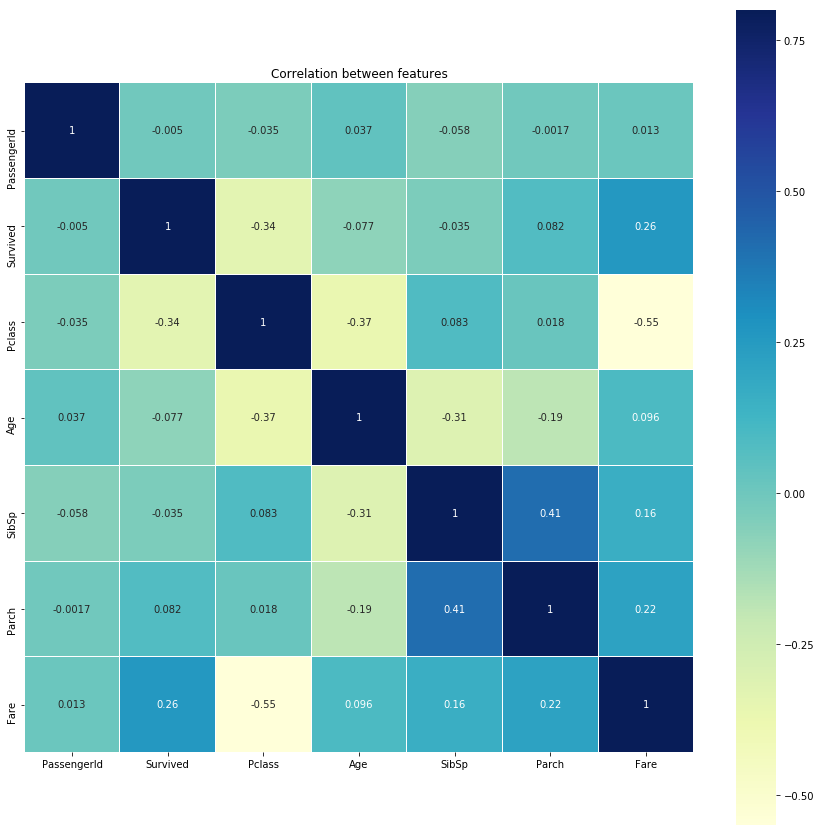

In [3]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax= 0.8, linewidths=0.01, square=True, annot= True, cmap='YlGnBu', linecolor='white')
plt.title('Correlation between features');

In [4]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

## Feature Engineering

### Where were passenger on the ship?

In [5]:
df['Deck'] = df['Cabin'].str[0]
df_test['Deck'] = df_test['Cabin'].str[0]
df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

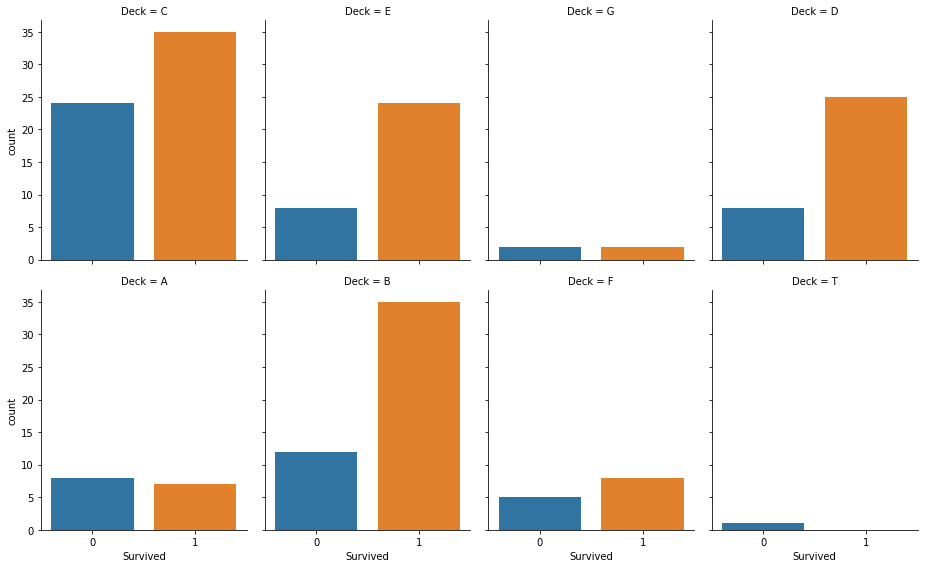

In [6]:
sns.factorplot('Survived', col='Deck', col_wrap=4, data=df[df.Deck.notnull()], kind="count", aspect=0.8)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


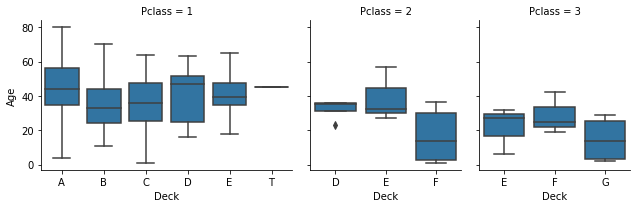

In [7]:
df = df.sort_values(by='Deck')
g = sns.FacetGrid(df, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

In [8]:
# Fill nan with Z value
df.Deck.fillna('Z', inplace=True)
df_test.Deck.fillna('Z', inplace=True)
df['Deck'].unique()


array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype=object)

In [9]:
df_test['Deck'].unique()

array(['Z', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

### How big is your family?

In [11]:
#Family size = parents/children + siblings / spouses + passengers themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
print(df['FamilySize'].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [18]:
df.loc[df["FamilySize"] == 1, "Fsize"] = 'single'
df.loc[(df["FamilySize"] > 1)  &  (df["FamilySize"] < 5) , "Fsize"] = 'small'
df.loc[df["FamilySize"] >4, "Fsize"] = 'large'

df_test.loc[df_test["FamilySize"] == 1, "Fsize"] = 'single'
df_test.loc[(df_test["FamilySize"] >1) & (df_test["FamilySize"] <5) , "Fsize"] = 'small'
df_test.loc[df_test["FamilySize"] >4, "Fsize"] = 'large'

In [20]:
print(df["Fsize"].unique())
print(df["Fsize"].value_counts())

['single' 'small' 'large']
single    537
small     292
large      62
Name: Fsize, dtype: int64


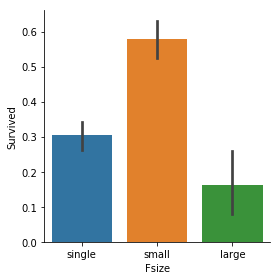

In [22]:
sns.factorplot(data=df, x="Fsize", y="Survived", kind="bar")